# Initialization

Load the signal y and target x from data.zip. Display
a scatterplot of your received and target signal. Divide your data into
training, validation and test dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import math
import re
import pickle
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!wget -O p_o.dat "https://drive.google.com/uc?export=download&id=1wTA_tEUIPN-k-KJLQjROZri1MzHeJl0U"
!wget -O p_tw.dat "https://drive.google.com/uc?export=download&id=1OAwifAlazVRwsXXvB5HCwtfmFL9e-QJQ"
!wget -O p_th.dat "https://drive.google.com/uc?export=download&id=1w7m07ZYn4sSOV4SimV9wDqb80zJU_7GW"
!wget -O p_fo.dat "https://drive.google.com/uc?export=download&id=1SFfYDLxSUl78-LAk5q9tYYb4wHHxL4ZW"
!wget -O p_fi.dat "https://drive.google.com/uc?export=download&id=1k5e_8KKHxqKmVwqjvhR1kEUCr5QRjxDX"

--2023-02-01 10:17:35--  https://drive.google.com/uc?export=download&id=1wTA_tEUIPN-k-KJLQjROZri1MzHeJl0U
Resolving drive.google.com (drive.google.com)... 108.177.12.101, 108.177.12.138, 108.177.12.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.12.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/utdsjjpm429sghrg4hugo3rdp4nks2d9/1675246650000/00806258749903615801/*/1wTA_tEUIPN-k-KJLQjROZri1MzHeJl0U?e=download&uuid=ee1d5ff6-5a8e-4064-8475-9d48308420bc [following]
--2023-02-01 10:17:38--  https://doc-04-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/utdsjjpm429sghrg4hugo3rdp4nks2d9/1675246650000/00806258749903615801/*/1wTA_tEUIPN-k-KJLQjROZri1MzHeJl0U?e=download&uuid=ee1d5ff6-5a8e-4064-8475-9d48308420bc
Resolving doc-04-80-docs.googleusercontent.com (doc-04-80-docs.googleusercontent.com)... 173.194.210.132, 2607

In [3]:
# Import data

!wget -O x.zip "https://drive.google.com/uc?export=download&id=1221858Ognjuffo3Pv6QezSiBw8xBOBe-"
!wget -O a.txt "https://drive.google.com/uc?export=download&id=1u5TAN-nRjHoAQ02J5-3o3Yr53m66Vw56"
!wget -O equal.pth "https://drive.google.com/uc?export=download&id=1_RIKfYvv6AuBmpeHZv1Nb3e5_qgpxRh0"
!wget -O last_batch.pt "https://drive.google.com/uc?export=download&id=14iAT_hqcGhVjhE4mjUfinbCcBUz2poD-"
!wget -O val.pt "https://drive.google.com/uc?export=download&id=1gAOBvvAhP7QO1Ol0Tc_QOnAStgy2tOic"
!wget -O A_hat "https://drive.google.com/uc?export=download&id=1QJ3QuSHQ01lWYjBqS4EVlNg7U29UNg3e"
!wget -O X_hat "https://drive.google.com/uc?export=download&id=1fDwJIjj4dgKcG4X2abBuTpNlqSkCXFKZ"
!wget -O equal1.pth "https://drive.google.com/uc?export=download&id=1PdHUuWRAFwu_oSlQA7-8opbvfUW-uRHF"
!wget -O demap.pth "https://drive.google.com/uc?export=download&id=1ZuCvUqbxX8hxUPDLVycLk7G-4caZ252U"
!wget -O val1.pt "https://drive.google.com/uc?export=download&id=1hbvau4XbxRlZ1vtQEoWK5N3ad2a6dyJB"
!wget -O last_batch1.pt "https://drive.google.com/uc?export=download&id=1JJrW2dy-I6Qqorsc6FGxxLwMJW7f_N-3"

--2023-02-01 10:17:51--  https://drive.google.com/uc?export=download&id=1221858Ognjuffo3Pv6QezSiBw8xBOBe-
Resolving drive.google.com (drive.google.com)... 108.177.12.101, 108.177.12.138, 108.177.12.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.12.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8jdphr3491rv537fe0n34md5virqrbqd/1675246650000/00806258749903615801/*/1221858Ognjuffo3Pv6QezSiBw8xBOBe-?e=download&uuid=d9bea790-7e22-4675-a264-d236f2281d15 [following]
--2023-02-01 10:17:57--  https://doc-0s-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8jdphr3491rv537fe0n34md5virqrbqd/1675246650000/00806258749903615801/*/1221858Ognjuffo3Pv6QezSiBw8xBOBe-?e=download&uuid=d9bea790-7e22-4675-a264-d236f2281d15
Resolving doc-0s-80-docs.googleusercontent.com (doc-0s-80-docs.googleusercontent.com)... 173.194.210.132, 2607

In [4]:
with ZipFile('/content/x.zip', 'r') as f:
  f.extract('x.txt')

In [5]:
# Load data

a = np.loadtxt('a.txt')
a_t = torch.tensor(a)
a_t = a_t.type(torch.LongTensor)

x_real = []
x_imag = []
x = []
with open('x.txt') as input_file:
    for line in input_file:
      temp = re.sub(r'[()]', "", line)
      temp = complex(temp)
      x.append((temp.real, temp.imag))
      x_real.append(temp.real)
      x_imag.append(temp.imag)

y_real = []
y_imag = []
#with open('drive/MyDrive/y.txt') as input_file:
with open('y.txt') as input_file:
    for line in input_file:
      temp = re.sub(r'[()]', "", line)
      temp = complex(temp)
      y_real.append(temp.real)
      y_imag.append(temp.imag)

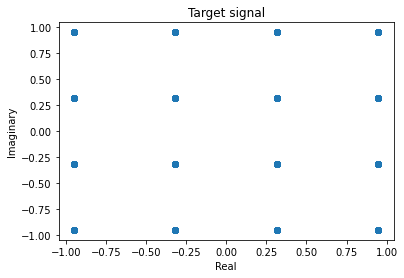

In [6]:
# Scatterplot of target signal

plt.scatter(x_real, x_imag)
plt.title('Target signal')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

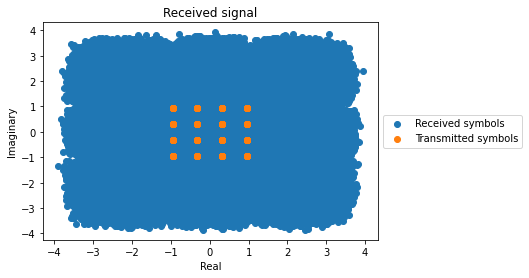

In [7]:
# Scatterplot of received signal

plt.scatter(y_real, y_imag, label='Received symbols')
plt.scatter(x_real, x_imag, label = 'Transmitted symbols')
plt.title('Received signal')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
# Conversion to TensorFlow

x_real_t = torch.Tensor(x_real).reshape(-1,1)
x_imag_t = torch.Tensor(x_imag).reshape(-1,1)
X = torch.stack((x_real_t, x_imag_t), -1)

y_real_t = torch.Tensor(y_real).reshape(-1,1)
y_imag_t = torch.Tensor(y_imag).reshape(-1,1)
Y = torch.stack((y_real_t, y_imag_t), -1)

In [9]:
# Divide your data into training, validation and test dataset

a_train, a_test =  train_test_split(a_t, test_size=0.2, shuffle=False)
x_train, x_test =  train_test_split(X, test_size=0.2, shuffle=False)
y_train, y_test =  train_test_split(Y, test_size=0.2, shuffle=False)

a_val, a_test =  train_test_split(a_t, test_size=0.5, shuffle=False)
x_val, x_test =  train_test_split(X, test_size=0.5, shuffle=False)
y_val, y_test =  train_test_split(Y, test_size=0.5, shuffle=False)

# MSE training

Design and train a nonlinear neural network to equalize
the received signal. Train your model according to MSE loss function.
Display training vs validation loss for increasing number of epochs.
After the training is over, display a scatterplot of yeq.

In [10]:
# Define nonlinear NN for equalizer

class NonlinEq(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(2, 50)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(50, 20)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(20,2)

    def forward(self, y):
        y = self.relu1(self.lin1(y))
        y = self.relu2(self.lin2(y))
        return self.lin3(y)[::2]

In [11]:
# Load data calculate with Equalizer.ipynb

loss_fn = nn.MSELoss()
nleq = torch.load('equal.pth')
loss_last_batch = torch.load('last_batch.pt')
loss_val_set = torch.load('val.pt')

In [12]:
# Calculate test loss 
loss_test = loss_fn(nleq(y_test), x_test).detach().numpy()

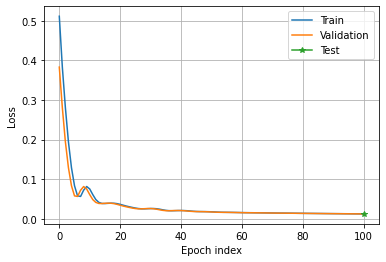

In [13]:
# Plot training vs validation loss for increasing number of epochs

plt.plot(np.arange(len(loss_last_batch)), loss_last_batch, label="Train")
plt.plot(np.arange(len(loss_val_set)), loss_val_set, label="Validation")
plt.plot(len(loss_val_set)-1, loss_test, marker='*', label="Test")
plt.xlabel('Epoch index')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [14]:
# Convert y_eq in two arrays so that it can be plot

y_eq = nleq(Y)
yeq = y_eq.detach().numpy()
yeq=yeq[:,0,:]
yeq_real = yeq[:,0]
yeq_imag = yeq[:,1]

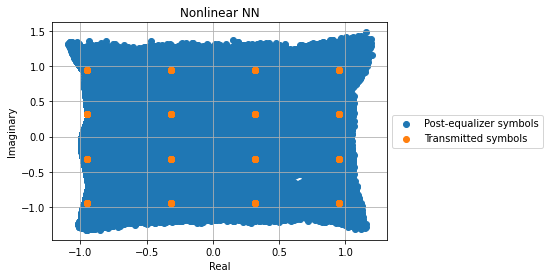

In [15]:
# Scatterplot of the received signal after equalization

plt.scatter(yeq_real, yeq_imag, label='Post-equalizer symbols')
plt.scatter(x_real, x_imag, label = 'Transmitted symbols')
plt.title('Nonlinear NN')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Hard-decision demapper

Define a method to perform hard-decision
(HD) demapping after the neural network equalizer. The demapper takes
a decision according to the Euclidean distance:
$$ \widehat{x} = \underset{x}{\operatorname{argmin}} |y_{eq} - x|, x \in \mathcal{X} $$
Apply the defined demapper to the equalizer output. What is the value
of the symbol error rate (SER)?
Apply binary reflected gray labeling to both your transmit symbol and
output of the demapper. What is the value of the bit error rate (BER)?

In [16]:
# Create a list with the 16 different mapped symbols

map_sym = list(dict.fromkeys(x))

In [17]:
# Load data calculate with Hard_decision.ipynb

with open("A_hat", "rb") as fp:
    A_hat = pickle.load(fp)
with open("X_hat", "rb") as fp:
    X_hat = pickle.load(fp)

In [18]:
# Calculate SER

counter = 0
for j in range(len(x)):
    if a[j] != A_hat[j]:
        counter = counter + 1

SER = counter/len(x)
print(f'The SER with an hard-decision demapper is {SER}')

The SER with an hard-decision demapper is 0.020189


In [19]:
# Binary combination for the 16 symbols

def get_labeling(msg):
    label = np.array([[0,0,0,0], [0,0,0,1], [0,0,1,1], [0,0,1,0], [0,1,1,0], [0,1,1,1], [0,1,0,1], [0,1,0,0],
                     [1,0,0,0], [1,0,0,1], [1,0,1,1], [1,0,1,0], [1,1,1,0], [1,1,1,1], [1,1,0,1], [1,1,0,0]])
    return label[msg, :]

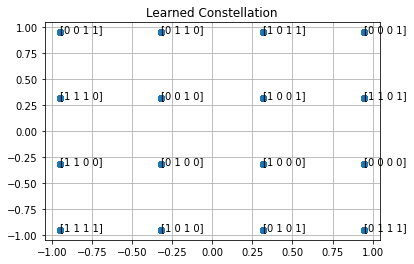

In [20]:
M = 16
a_plot = np.arange(M)
b_plot = get_labeling(a_plot)
plt.scatter(x_real, x_imag)
for i in range(M):
    plt.annotate(f'{b_plot[i,:]}', map_sym[i])
plt.title(f'Learned Constellation')
plt.grid()
plt.show()

In [21]:
# Link every symbol with its binary code

map = []
for i in range(M):
    map.append((b_plot[i,:], map_sym[i]))

In [22]:
# Assign the binary code to the trasmitted signal and the estimated one

x_map = []
X_hat_map = []
for i in range(len(x)):
    for j in range(len(map)):
        if x[i] == map[j][1]:
            x_map.append(map[j][0])
        if X_hat[i] == map[j][1]:
            X_hat_map.append(map[j][0])    

In [23]:
# Check bit by bit and count the errors

counter = 0
for j in range(len(x)):
    for i in range(4):
        if x_map[j][i] != X_hat_map[j][i]:
            counter = counter + 1

BER = counter/(4*len(x))
print(f'The BER with an hard-decision demapper is {BER}')

The BER with an hard-decision demapper is 0.011558625


In [24]:
if BER > SER:
    print('With hard-decision BER greater than SER')
elif BER == SER:
    print('With hard-decision BER equal to SER')
else:
    print('With hard-decision SER greater than BER')

With hard-decision SER greater than BER


# Soft-decision demapper

Define a method to perform soft-decision
(SD) demapping after the neural network equalizer according to AWGN
demapper:
$$ p_i = \frac{e^{-\frac{|y_{eq}−x_i|^2}{2σ^2}}}{\sum_{k}^{|\mathcal{X}|−1}e^{-\frac{|y_{eq}−x_k|^2}{2σ^2}}}, i = 0, 1, ..., |\mathcal{X}|−1 $$
$$σ^2 = \frac{1}{n}\sum_{j=0}^{n-1}|y_{eq,j}−x_j|^2 $$
Apply the defined SD demapper to the equalizer output. From the a
posteriori probabilities calculate the estimate of the equivocation

In [25]:
# Load data calculate with Soft_decision.ipynb

#p = np.fromfile('drive/MyDrive/p.dat', dtype=float)
p_o = np.fromfile('p_o.dat', dtype=float)
p_tw = np.fromfile('p_tw.dat', dtype=float)
p_th = np.fromfile('p_th.dat', dtype=float)
p_fo = np.fromfile('p_fo.dat', dtype=float)
p_fi = np.fromfile('p_fi.dat', dtype=float)

In [26]:
p = np.concatenate((p_o,p_tw))
p = np.concatenate((p,p_th))
p = np.concatenate((p,p_fo))
p = np.concatenate((p,p_fi))
p = p.reshape(len(x), len(map_sym))

In [27]:
# Maximum a posteriori probability

soft_dec = []
for j in range(len(x)):
    max_index = np.where(p[j] == np.max(p[j]))
    soft_dec.append(map_sym[int(max_index[0])])

In [28]:
counter = 0
for j in range(len(x)):
    if x[j] != soft_dec[j]:
        counter = counter + 1

SER = counter/len(x)
print(f'The SER with MAP rule appield to a soft-decision demapper is {SER}')

The SER with MAP rule appield to a soft-decision demapper is 0.020189


In [29]:
# Calculate empirical equivocation

loss_fn = nn.CrossEntropyLoss()
equivocation = loss_fn(torch.Tensor(p), a_t).detach().numpy()/np.log(2)
print(f'The empirical equivocation is {equivocation}')

The empirical equivocation is 3.970679032811043


# CE training

Design and train a nonlinear neural network which performs
jointly equalization and demapping. Train your model according to the
cross entropy (CE) loss function. Display training vs validation loss.
After the training, calculate the SER, BER and estimate of the equivocation.

In [30]:
# Define nonlinear NN for equalizer

class NonlinEq(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(2, 50)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(50, 20)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(20, 2)

    def forward(self, y):
        y = self.relu1(self.lin1(y))
        y = self.relu2(self.lin2(y))
        return self.lin3(y)[::2]

In [31]:
# Define linear NN for Demapping

class Demapper(nn.Module):
    def __init__(self):
        super().__init__()
        self.out = nn.Linear(2, 16)

    def forward(self, y):
        return self.out(y)

In [32]:
# Load data calculate with CE_loss.ipynb

loss_fn = nn.CrossEntropyLoss()
nleq_1 = torch.load('equal1.pth')
demap = torch.load('demap.pth')
loss_val_set_1 = torch.load('val1.pt')
loss_last_batch_1 = torch.load('last_batch1.pt')

In [33]:
# Calculate test loss 
loss_test_1 = loss_fn(demap(nleq_1(y_test)).reshape(-1, 16), a_test).detach().numpy()

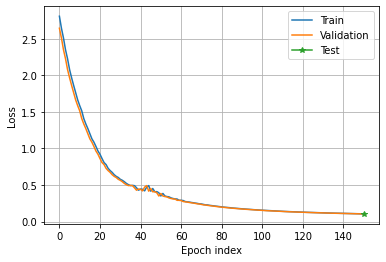

In [34]:
# Plot training vs validation loss for increasing number of epochs

plt.plot(np.arange(len(loss_last_batch_1)), loss_last_batch_1, label="Train")
plt.plot(np.arange(len(loss_val_set_1)), loss_val_set_1, label="Validation")
plt.plot(len(loss_val_set_1)-1, loss_test_1, marker='*', label="Test")
plt.xlabel('Epoch index')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [35]:
# Estimate symbols taking the max log probability

l = demap(nleq_1(Y)).reshape(-1, 16).detach().numpy()
hard_ce = l.argmax(axis=1)

In [36]:
# Calculate SER

counter = 0
for j in range(a.size):
  if a[j] != hard_ce[j]:
    counter = counter + 1

SER = counter/a.size
print(f'The SER with an hard-decision demapper trained with CE loss is {SER}')

The SER with an hard-decision demapper trained with CE loss is 0.02535


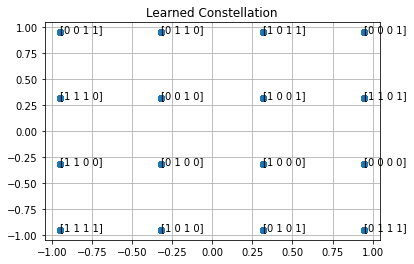

In [37]:
M = 16
a_plot = np.arange(M)
b_plot = get_labeling(a_plot)
plt.scatter(x_real, x_imag)
for i in range(M):
    plt.annotate(f'{b_plot[i,:]}', map_sym[i])
plt.title(f'Learned Constellation')
plt.grid()
plt.show()

In [38]:
# Link every message with its binary code

map = []
for i in range(M):
    map.append((b_plot[i,:], map_sym[i]))

In [39]:
# Create a correspondence between message and symbol

dictionary = np.zeros((len(x),3))
for i in range(len(x)):
    dictionary[i][0] = a[i]
    dictionary[i][1] = x_real[i]
    dictionary[i][2] = x_imag[i]

corr = []
for j in range(M):
    for k in range(len(x)):
        if j == dictionary[k][0]:
          corr.append((j, (dictionary[k][1],dictionary[k][2])))
corr = list(dict.fromkeys(corr))

In [40]:
x_ce = []
for i in range(len(x)):
    for j in range(M):
        if hard_ce[i] == corr[j][0]:
            x_ce.append(corr[j][1])
            break

In [41]:
# Assign the binary code to the trasmitted signal and the estimated one

x_map = []
x_hat_map = []
for i in range(len(x)):
    for j in range(len(map)):
        if x[i] == map[j][1]:
            x_map.append(map[j][0])
        if x_ce[i] == map[j][1]:
            x_hat_map.append(map[j][0])  

In [42]:
# Check bit by bit and count the errors

counter = 0
for j in range(len(x)):
    for i in range(4):
        if x_map[j][i] != x_hat_map[j][i]:
            counter = counter + 1

BER = counter/(4*len(x))
print(f'The BER with an hard-decision demapper trained with CE loss is {BER}')

The BER with an hard-decision demapper trained with CE loss is 0.014444125


In [43]:
equivocation = loss_fn(torch.Tensor(l), a_t).detach().numpy()/np.log(2)
print(f'The empirical equivocation is {equivocation}')

The empirical equivocation is 0.1523526800803158
